In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras.datasets import mnist

In [30]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [31]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
from tensorflow.keras.models import Sequential
from keras.layers import Flatten, MaxPooling2D, Conv2D, Dense

In [33]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2),padding='valid'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2),padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,258 (1.64 MB)

 Trainable params: 429,258 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [35]:
history = model.fit(x_train,y_train,epochs=5,validation_data = (x_test,y_test),batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8851 - loss: 0.3826 - val_accuracy: 0.9809 - val_loss: 0.0584
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9834 - loss: 0.0532 - val_accuracy: 0.9867 - val_loss: 0.0383
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9826 - val_loss: 0.0531
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9912 - loss: 0.0265 - val_accuracy: 0.9870 - val_loss: 0.0422
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9884 - val_loss: 0.0340


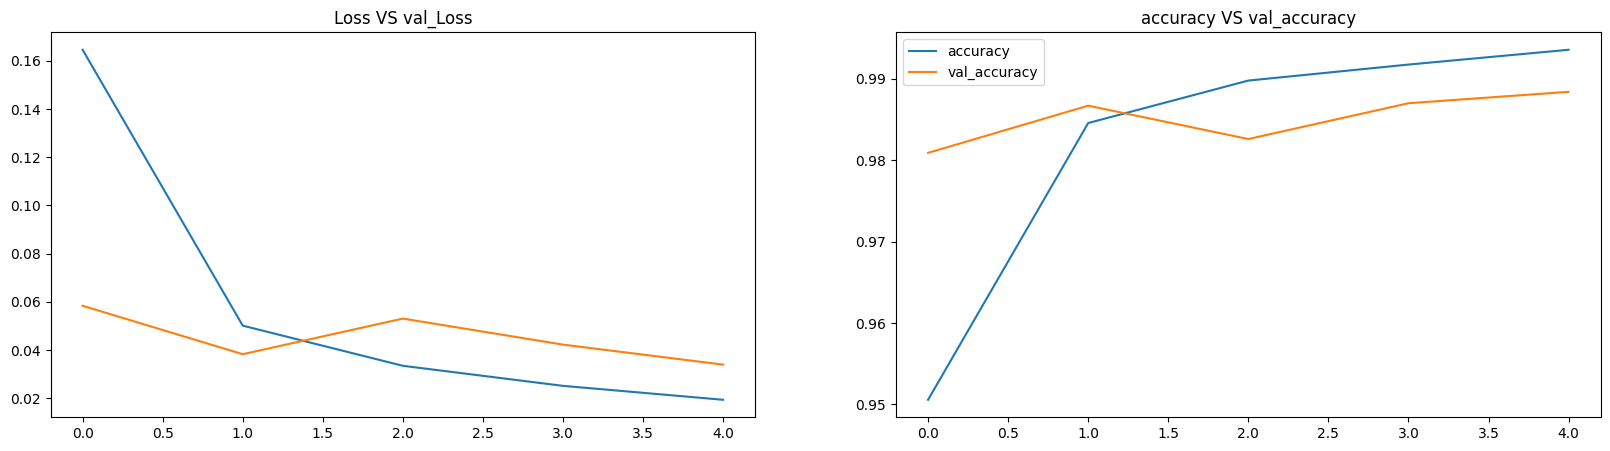

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'val_Loss')
plt.title("Loss VS val_Loss")
plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("accuracy VS val_accuracy")
plt.legend()
plt.show()

In [37]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0340
Test Accuracy: 0.9884


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
Predictions: [7 2 1 0 4]
True Labels: [7 2 1 0 4]


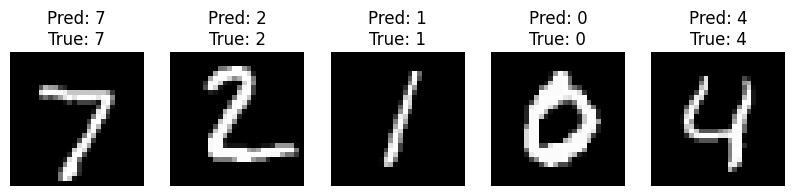

In [38]:
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test[:5], axis=1)

print("Predictions:", predicted_digits)
print("True Labels:", true_labels)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

In [30]:
np.argmax(predictions, axis=1)

array([7, 2, 1, 0, 4])

# Transfer Learning VGG16

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

2025-08-21 10:49:52.768508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755773392.939567      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755773392.990815      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
x_train = np.array([tf.image.resize(img[..., np.newaxis], (48, 48)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (48, 48)) for img in x_test])

x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

I0000 00:00:1755773424.606545      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [3]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in vgg16.layers:
    layer.trainable = False

inputs = Input(shape=(48, 48, 3))
x = vgg16(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5


I0000 00:00:1755773652.664440      97 service.cc:148] XLA service 0x7ce66402e0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755773652.665022      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755773653.020339      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


 13/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.2262 - loss: 2.2472

I0000 00:00:1755773655.353649      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.8406 - loss: 0.5725 - val_accuracy: 0.9560 - val_loss: 0.1468
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9624 - loss: 0.1216 - val_accuracy: 0.9678 - val_loss: 0.1051
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9710 - loss: 0.0935 - val_accuracy: 0.9677 - val_loss: 0.1041
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9737 - loss: 0.0834 - val_accuracy: 0.9745 - val_loss: 0.0783
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9777 - loss: 0.0692 - val_accuracy: 0.9752 - val_loss: 0.0817



Test Loss: 0.0817
Test Accuracy: 0.9752

Making predictions on the first 5 test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Digits: [7 2 1 0 4]
True Digits: [7 2 1 0 4]


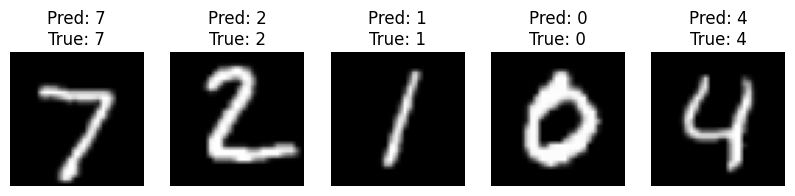

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the first 5 test images
print("\nMaking predictions on the first 5 test images...")
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # The image data has 3 channels, so we can display just one
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

# Resnet50

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train = np.array([tf.image.resize(img[..., np.newaxis], (32, 32)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (32, 32)) for img in x_test])

# Repeat the single channel to three channels to simulate RGB
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in resnet_base.layers:
    layer.trainable = False


inputs = Input(shape=(32, 32, 3))
x = resnet_base(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7262 - loss: 0.8879 - val_accuracy: 0.9094 - val_loss: 0.3026
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8935 - loss: 0.3379 - val_accuracy: 0.9230 - val_loss: 0.2435
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9086 - loss: 0.2889 - val_accuracy: 0.9148 - val_loss: 0.2551
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9198 - loss: 0.2511 - val_accuracy: 0.9290 - val_loss: 0.2174
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9231 - loss: 0.2409 - val_accuracy: 0.9350 - val_loss: 0.2062



Test Loss: 0.2062
Test Accuracy: 0.9350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Digits: [1 4 8 5 9]
True Digits: [1 4 9 5 9]


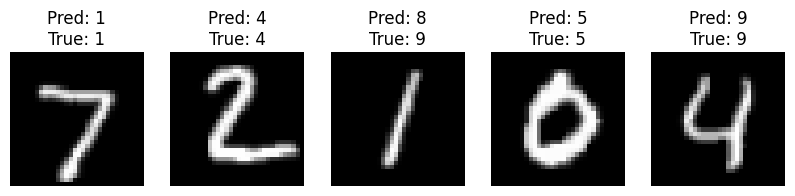

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

predictions = model.predict(x_test[5:10])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[5:10], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Display the grayscale image from one channel
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

In [15]:
x_test[5:10].shape

(5, 32, 32, 3)

 # InceptionV3

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
x_train = np.array([tf.image.resize(img[..., np.newaxis], (75, 75)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (75, 75)) for img in x_test])

x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from tensorflow.keras.applications.inception_v3 import preprocess_input

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [19]:
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

for layer in inception_base.layers:
    layer.trainable = False

inputs = Input(shape=(75, 75, 3))
x = inception_base(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 1, 1, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,329,898 (85.18 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.8465 - loss: 0.4652 - val_accuracy: 0.9178 - val_loss: 0.2430
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9347 - loss: 0.2011 - val_accuracy: 0.9355 - val_loss: 0.1973
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9481 - loss: 0.1565 - val_accuracy: 0.9411 - val_loss: 0.1801
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9573 - loss: 0.1296 - val_accuracy: 0.9422 - val_loss: 0.1793
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9668 - loss: 0.0999 - val_accuracy: 0.9411 - val_loss: 0.1856



Test Loss: 0.1856
Test Accuracy: 0.9411

Making predictions on the first 5 test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Digits: [1 4 9 5 9]
True Digits: [1 4 9 5 9]


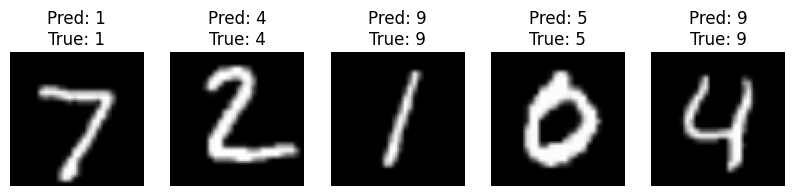

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on a few test images
print("\nMaking predictions on the first 5 test images...")
predictions = model.predict(x_test[5:10])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[5:10], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # The image data has 3 channels, but you can display one to visualize it
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

# MobileNetV2 

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
# Resize images to 96x96
x_train = np.array([tf.image.resize(img[..., np.newaxis], (96, 96)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (96, 96)) for img in x_test])

# Repeat the channel dimension from 1 to 3 to simulate RGB
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Apply MobileNetV2's specific preprocessing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [25]:
# Load the MobileNetV2 model with pre-trained ImageNet weights, excluding the top classifier
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze the MobileNetV2 base layers
for layer in mobilenet_base.layers:
    layer.trainable = False

# Create the new model on top of the MobileNetV2 base
inputs = Input(shape=(96, 96, 3))
x = mobilenet_base(inputs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,474,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733,962 (14.24 MB)

 Trainable params: 1,475,978 (5.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9260 - loss: 0.3132 - val_accuracy: 0.9767 - val_loss: 0.0721
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9872 - loss: 0.0390 - val_accuracy: 0.9828 - val_loss: 0.0623
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9911 - loss: 0.0255 - val_accuracy: 0.9828 - val_loss: 0.0620
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9841 - val_loss: 0.0590
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9808 - val_loss: 0.0820



Test Loss: 0.0820
Test Accuracy: 0.9808

Making predictions on the first 5 test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Digits: [7 2 1 0 4]
True Digits: [7 2 1 0 4]


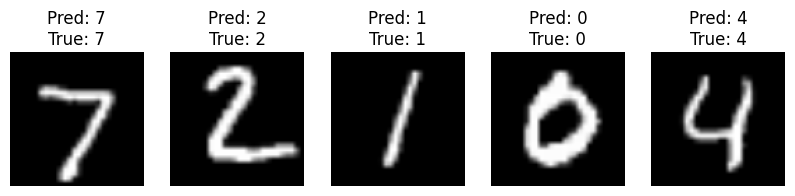

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on a few test images
print("\nMaking predictions on the first 5 test images...")
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Display the grayscale image from one channel
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()